# Graficación de provincias según los viajes realizados unicamente de manera interprovincial

# Carga de datos

In [1]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.9 MB/s 
     |████████████████████████████████| 15.4 MB 6.0 MB/s 


In [2]:
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/geolocalizaciones.geojson
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_AndaluciaLocalizado.csv
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_CLMLocalizado.csv

--2021-12-19 11:16:39--  https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/geolocalizaciones.geojson
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/geolocalizaciones.geojson [following]
--2021-12-19 11:16:40--  https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/geolocalizaciones.geojson
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/geolocalizaciones.geojson [following]
--2021-12-19 11:16:40--  https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/geolocalizaciones.geojson
Resolving raw.gith

Datos que incluyen la columna "geometry" para poder dibujar la silueta de la provincia.

In [3]:
map_data = gpd.read_file('geolocalizaciones.geojson')
map_data.head()

,id,NAME_1,NAME_2,geometry
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [4]:
df_CLMLocalizado = pd.read_csv('df_CLMLocalizado.csv')
df_CLMLocalizado.head(2)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,453525,2017-05-11,es,Albacete,Guadalajara,11.0,1,6,1,6,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No
1,453526,2017-12-11,es,Albacete,Guadalajara,11.0,1,6,1,6,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No


In [5]:
df_AnaluciaLocalizado = pd.read_csv('df_AndaluciaLocalizado.csv')
df_AnaluciaLocalizado.head(2)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,285649,2017-01-11,es,Albox,Granada,1.0,1,1,1,1,0,Andalucía,Andalucía,Almería,Granada,No
1,285650,2017-03-11,es,Albox,Granada,12.0,1,4,1,4,0,Andalucía,Andalucía,Almería,Granada,No


## Viajes en Castilla-La Mancha

In [6]:
clm = map_data[map_data["NAME_1"] == 'Castilla-La Mancha']
clm

,id,NAME_1,NAME_2,geometry
12,12,Castilla-La Mancha,Albacete,"MULTIPOLYGON (((-2.76198 38.53278, -2.76382 38..."
13,13,Castilla-La Mancha,Ciudad Real,"MULTIPOLYGON (((-4.94063 39.39513, -4.94171 39..."
14,14,Castilla-La Mancha,Cuenca,"MULTIPOLYGON (((-2.66225 39.32198, -2.66506 39..."
15,15,Castilla-La Mancha,Guadalajara,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40..."
16,16,Castilla-La Mancha,Toledo,"MULTIPOLYGON (((-5.33994 39.89062, -5.36937 39..."


Extraemos solo los viajes interprovinciales.

In [7]:
interprovincias_clm = df_CLMLocalizado[df_CLMLocalizado['INTERPROVINCIAL']== 'Si']
interprovincias_clm.head(4)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
336,454738,2018-03-05,es,Molina de Aragón,Guadalajara,3.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Guadalajara,Guadalajara,Si
337,454739,2019-08-01,es,Molina de Aragón,Guadalajara,8.0,1,3,1,3,0,Castilla-La Mancha,Castilla-La Mancha,Guadalajara,Guadalajara,Si
338,454740,2019-08-05,es,Molina de Aragón,Guadalajara,2.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Guadalajara,Guadalajara,Si
339,454741,2019-06-28,es,Molina de Aragón,Guadalajara,1.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Guadalajara,Guadalajara,Si


A continuación sumamos el total de viajes que tiene una determinada provincia de forma que obtenemos los viajes totales interprovinciales.

In [8]:
provincias = clm['NAME_2'].to_numpy().tolist()
suma = []
for i in provincias:
  prov = interprovincias_clm[interprovincias_clm['PROVINCIA_ORIGEN'] == i]
  sumatorio = prov['VIAJES_CONFIRMADOS'].sum()
  suma.append(sumatorio)
  
clm['TOTAL_VIAJES'] = suma
clm

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,NAME_1,NAME_2,geometry,TOTAL_VIAJES
12,12,Castilla-La Mancha,Albacete,"MULTIPOLYGON (((-2.76198 38.53278, -2.76382 38...",3958
13,13,Castilla-La Mancha,Ciudad Real,"MULTIPOLYGON (((-4.94063 39.39513, -4.94171 39...",3123
14,14,Castilla-La Mancha,Cuenca,"MULTIPOLYGON (((-2.66225 39.32198, -2.66506 39...",191
15,15,Castilla-La Mancha,Guadalajara,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40...",23
16,16,Castilla-La Mancha,Toledo,"MULTIPOLYGON (((-5.33994 39.89062, -5.36937 39...",2878


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


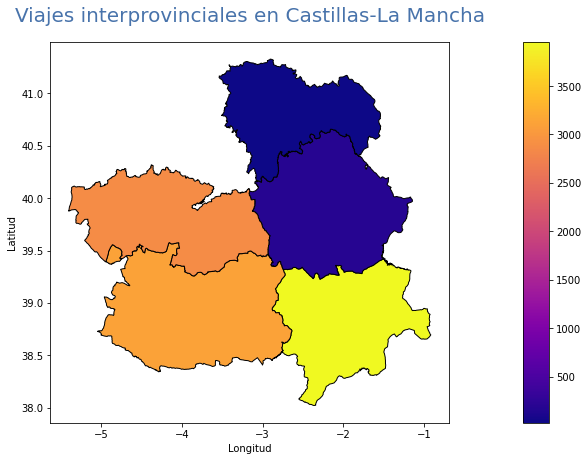

In [9]:
clm['coords'] = clm['geometry'].apply(lambda x: x.representative_point().coords[:])

clm['coords'] = [coords[0] for coords in clm['coords']]
fig, ax = plt.subplots(figsize = (10,10))

# Control del título y los ejes
ax.set_title('Viajes interprovinciales en Castillas-La Mancha', 
             pad = 20, 
              fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

clm.plot(column='TOTAL_VIAJES', cmap='plasma', ax=ax, legend=True, cax=cax, edgecolor='black')

fig.show()

Se puede observar de manera visual que la provincia de CLM con más viajes interprovinciales en blablacar es Albacete.

## Viajes en Andalucía

Seguimos el mismo procedimiento que en Castilla-La Mancha

In [10]:
andalucia = map_data[map_data["NAME_1"] == 'Andalucía']
andalucia

,id,NAME_1,NAME_2,geometry
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."


In [11]:
interprovincias_andalucia = df_AnaluciaLocalizado[df_AnaluciaLocalizado['INTERPROVINCIAL']== 'Si']
interprovincias_andalucia.head(3)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
2489,289277,2017-01-11,es,Baza,Granada,20.0,1,11,1,11,0,Andalucía,Andalucía,Granada,Granada,Si
2490,289278,2017-02-11,es,Baza,Granada,37.0,1,15,1,14,0,Andalucía,Andalucía,Granada,Granada,Si
2491,289279,2017-03-11,es,Baza,Granada,73.0,6,28,5,27,2,Andalucía,Andalucía,Granada,Granada,Si


In [12]:
provincias = andalucia['NAME_2'].to_numpy().tolist()
suma = []
for i in provincias:
  prov = interprovincias_andalucia[interprovincias_andalucia['PROVINCIA_ORIGEN'] == i]
  sumatorio = prov['VIAJES_CONFIRMADOS'].sum()
  suma.append(sumatorio)
  
andalucia['TOTAL_VIAJES'] = suma
andalucia

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,NAME_1,NAME_2,geometry,TOTAL_VIAJES
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",7785
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",19684
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",7534
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",17716
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",209
5,5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",1003
6,6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",24670
7,7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",4523


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


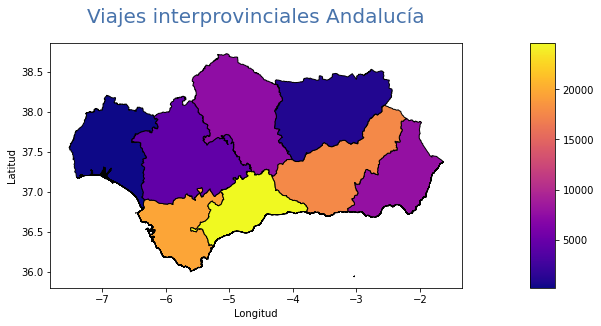

In [13]:
andalucia['coords'] = andalucia['geometry'].apply(lambda x: x.representative_point().coords[:])

andalucia['coords'] = [coords[0] for coords in andalucia['coords']]
fig, ax = plt.subplots(figsize = (10,10))

# Control del título y los ejes
ax.set_title('Viajes interprovinciales Andalucía', 
             pad = 20, 
              fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

andalucia.plot(column='TOTAL_VIAJES', cmap='plasma', ax=ax, legend=True, cax=cax, edgecolor='black')

fig.show()

Se puede observar de manera visual que la provincia de Andalucía con más viajes interprovinciales en blablacar es Málaga.